<a href="https://www.kaggle.com/code/sjagkoo7/time-series-crypto-currencies?scriptVersionId=138038675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import profile_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

/kaggle/input/crypto-currencies-data-set/data1.csv


# Reading the Dataset

In [2]:
crypto_time=pd.read_csv('/kaggle/input/crypto-currencies-data-set/data1.csv')
crypto_time

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1557148860,5632.41,5635.76,5629.10,5633.36,1.405411,7917.066006,5633.273178
1,1557148920,5636.48,5638.76,5633.14,5638.76,0.892639,5033.067778,5638.413488
2,1557148980,5636.35,5637.12,5632.16,5635.58,3.845588,21675.008206,5636.331776
3,1557149040,5632.64,5634.31,5628.66,5634.31,6.542373,36837.086909,5630.539261
4,1557149100,5628.85,5631.61,5628.85,5629.08,0.063818,359.394486,5631.527108
...,...,...,...,...,...,...,...,...
999995,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
999996,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
999997,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
999998,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [3]:
crypto_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          1000000 non-null  int64  
 1   Open               987554 non-null   float64
 2   High               987554 non-null   float64
 3   Low                987554 non-null   float64
 4   Close              987554 non-null   float64
 5   Volume_(BTC)       987554 non-null   float64
 6   Volume_(Currency)  987554 non-null   float64
 7   Weighted_Price     987554 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 61.0 MB


> *Here except Timestamp all columns have few null values which require to handle which we see in coming scetions*

In [4]:
crypto_time.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,1.000000e+06,987554.000000,987554.000000,987554.000000,987554.000000,9.875540e+05,9.875540e+05,987554.000000
mean,1.587149e+09,14766.800196,14777.071639,14756.483396,14766.809405,6.086695e+00,8.879270e+04,14766.883422
std,1.732052e+07,12572.503751,12583.228213,12561.531217,12572.801704,1.616051e+01,2.465049e+05,12571.871645
min,1.557149e+09,3858.270000,3927.050000,3850.000000,3865.000000,1.700000e-07,9.133420e-04,3875.980373
25%,1.572149e+09,8464.990000,8469.175000,8460.055000,8464.505000,3.310995e-01,3.339827e+03,8464.947580
50%,1.587149e+09,9782.455000,9788.730000,9776.940000,9782.425000,1.618063e+00,1.991209e+04,9783.296140
75%,1.602149e+09,11880.625000,11887.117500,11875.050000,11880.860000,5.492603e+00,7.546337e+04,11881.328871
max,1.617149e+09,61763.560000,61781.830000,61673.550000,61781.800000,1.098349e+03,1.390067e+07,61716.205341


# Dataset Information 

In [5]:
#crypto_time.shape # total rows and columns
#crypto_time.size  # total elements present in dataset
crypto_time.columns.to_list() # list of columns name in datset
#len(crypto_time.columns) # total columns in dataset
#len(crypto_time) # total rows in datset

['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'Volume_(BTC)',
 'Volume_(Currency)',
 'Weighted_Price']

# Data Preprocessing - Handling Null Values

In [6]:
#displaying the cells having null values
#crypto_time[crypto_time['Open'].isna()]
crypto_time.loc[crypto_time['Open'].isna()]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
145,1557157560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,1557167220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,1557182160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
984,1557207900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,1557213180,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
998868,1617080940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998931,1617084720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998999,1617088800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999963,1617146640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> *as all feature entries are null except Timestamp so it's it better to drop these entries*

In [7]:
crypto_time.isna().sum()

Timestamp                0
Open                 12446
High                 12446
Low                  12446
Close                12446
Volume_(BTC)         12446
Volume_(Currency)    12446
Weighted_Price       12446
dtype: int64

In [8]:
#dropping the all null entries
crypto_time=crypto_time.dropna()

In [9]:
crypto_time.loc[crypto_time['Open'].isna()]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price


In [10]:
crypto_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987554 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          987554 non-null  int64  
 1   Open               987554 non-null  float64
 2   High               987554 non-null  float64
 3   Low                987554 non-null  float64
 4   Close              987554 non-null  float64
 5   Volume_(BTC)       987554 non-null  float64
 6   Volume_(Currency)  987554 non-null  float64
 7   Weighted_Price     987554 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 67.8 MB


# Data Preprocessing - Data Cleaning

In [11]:
#since dataset feature are numerical so checking unique value won't make any sense so let's leave this. We shall check duplciates entries in dataset.
# cols=crypto_time.columns.to_list()
# for col in cols:
#     print(crypto_time[cols].value_counts())

In [12]:
# Finding Duplicates Rows
#duplicate_rows_data=crypto_time.loc[crypto_time.duplicated()]
duplicate_rows_data=crypto_time[crypto_time.duplicated()]
duplicate_rows_data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price


> *here there is no duplicate entries in whole dataset*

In [13]:
#if duplicates exist - then we can remove using below
crypto_time=crypto_time.drop_duplicates()

In [14]:
crypto_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987554 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Timestamp          987554 non-null  int64  
 1   Open               987554 non-null  float64
 2   High               987554 non-null  float64
 3   Low                987554 non-null  float64
 4   Close              987554 non-null  float64
 5   Volume_(BTC)       987554 non-null  float64
 6   Volume_(Currency)  987554 non-null  float64
 7   Weighted_Price     987554 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 67.8 MB


# Feature Engineering

In [15]:
crypto_time_up=crypto_time.copy()

>**Performing following change**
* Converting Timetsamp to Datetime format with unit as **s** and renaming as 'Date'
* Renaming 'Weighted_Price' column as 'Price'

In [16]:
crypto_time_up['Timestamp']=pd.to_datetime(crypto_time_up['Timestamp'],unit='s')

In [17]:
crypto_time_up

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2019-05-06 13:21:00,5632.41,5635.76,5629.10,5633.36,1.405411,7917.066006,5633.273178
1,2019-05-06 13:22:00,5636.48,5638.76,5633.14,5638.76,0.892639,5033.067778,5638.413488
2,2019-05-06 13:23:00,5636.35,5637.12,5632.16,5635.58,3.845588,21675.008206,5636.331776
3,2019-05-06 13:24:00,5632.64,5634.31,5628.66,5634.31,6.542373,36837.086909,5630.539261
4,2019-05-06 13:25:00,5628.85,5631.61,5628.85,5629.08,0.063818,359.394486,5631.527108
...,...,...,...,...,...,...,...,...
999995,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
999996,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
999997,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
999998,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [18]:
crypto_time_up=crypto_time_up.rename(columns={'Timestamp':'Date','Weighted_Price':'Price'})

In [19]:
crypto_time_up

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Price
0,2019-05-06 13:21:00,5632.41,5635.76,5629.10,5633.36,1.405411,7917.066006,5633.273178
1,2019-05-06 13:22:00,5636.48,5638.76,5633.14,5638.76,0.892639,5033.067778,5638.413488
2,2019-05-06 13:23:00,5636.35,5637.12,5632.16,5635.58,3.845588,21675.008206,5636.331776
3,2019-05-06 13:24:00,5632.64,5634.31,5628.66,5634.31,6.542373,36837.086909,5630.539261
4,2019-05-06 13:25:00,5628.85,5631.61,5628.85,5629.08,0.063818,359.394486,5631.527108
...,...,...,...,...,...,...,...,...
999995,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
999996,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
999997,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
999998,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# Visualization

In [20]:
# Detailed Report
crypto_time_up.profile_report(title='Report',progress_bar=False)

In [21]:
# Co - relation
corr=crypto_time_up.corr()
corr

/tmp/ipykernel_21/575484429.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=crypto_time_up.corr()


,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Price
Open,1.000000,0.999999,0.999999,0.999998,-0.005287,0.272461,0.999999
High,0.999999,1.000000,0.999998,0.999999,-0.004923,0.273001,0.999999
Low,0.999999,0.999998,1.000000,0.999999,-0.005771,0.271771,0.999999
Close,0.999998,0.999999,0.999999,1.000000,-0.005330,0.272418,0.999999
Volume_(BTC),-0.005287,-0.004923,-0.005771,-0.005330,1.000000,0.767239,-0.005359
Volume_(Currency),0.272461,0.273001,0.271771,0.272418,0.767239,1.000000,0.272379
Price,0.999999,0.999999,0.999999,0.999999,-0.005359,0.272379,1.000000


<Axes: >

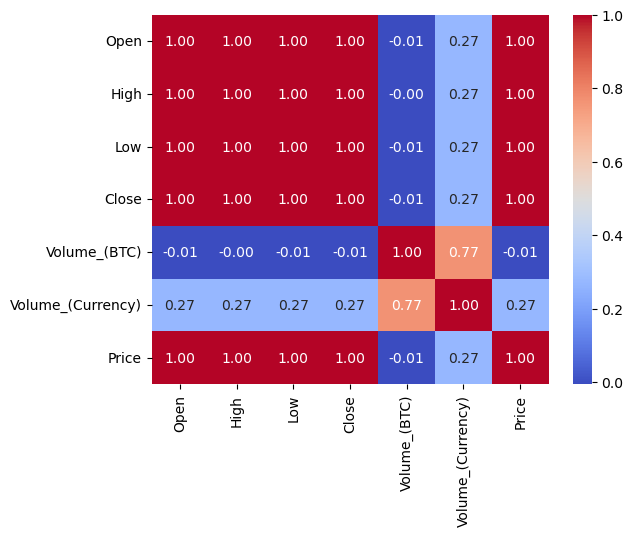

In [22]:
# heatmap of the Corelation
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.2f')

### EDA - Question 1 :
* Covert Timestamp to datetime format with unit 's' and rename as 'Date'
* Rename Weighted_Price as Price
* Drop all columns except Date and Price
* Set Date as DataFrame index


In [23]:
# Timestamp and Renaming Weighted_Price setup is done in previous cells
df=crypto_time_up[['Date','Price']]
df.set_index('Date', inplace=True)

In [24]:
df.head(5)

,Price
Date,
2019-05-06 13:21:00,5633.273178
2019-05-06 13:22:00,5638.413488
2019-05-06 13:23:00,5636.331776
2019-05-06 13:24:00,5630.539261
2019-05-06 13:25:00,5631.527108
